# Бинарная классификация отзывов к фильмам

Подключим библиотеки 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

Загрузим данные для тренировки и теста 

In [2]:
import time
start_time=time.time()

In [3]:
import os
train_dir=os.getcwd()+"/aclImdb/train"
test_dir=os.getcwd()+"/aclImdb/test"

In [4]:
reviews_train = load_files(train_dir)
text_train, y_train = reviews_train.data, reviews_train.target

In [5]:
print("Number of documents in training data: %d" % len(text_train))
print(np.bincount(y_train))

Number of documents in training data: 25000
[12500 12500]


In [6]:
reviews_test = load_files(test_dir)
text_test, y_test = reviews_test.data, reviews_test.target

In [7]:
print("Number of documents in test data: %d" % len(text_test))
print(np.bincount(y_test))

Number of documents in test data: 25000
[12500 12500]


Закодируем данные для дальнейшей работы с ними. Для этого используем vtnjl "Bag of words" и кодификатор CountVectorizer

In [8]:
cv = CountVectorizer()
cv.fit(text_train)
print(len(cv.vocabulary_))

74849


In [9]:
print(cv.get_feature_names()[:50])
print(cv.get_feature_names()[50000:50050])

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m']
['pincher', 'pinchers', 'pinches', 'pinching', 'pinchot', 'pinciotti', 'pine', 'pineal', 'pineapple', 'pineapples', 'pines', 'pinet', 'pinetrees', 'pineyro', 'pinfall', 'pinfold', 'ping', 'pingo', 'pinhead', 'pinheads', 'pinho', 'pining', 'pinjar', 'pink', 'pinkerton', 'pinkett', 'pinkie', 'pinkins', 'pinkish', 'pinko', 'pinks', 'pinku', 'pinkus', 'pinky', 'pinnacle', 'pinnacles', 'pinned', 'pinning', 'pinnings', 'pinnochio', 'pinnocioesque', 'pino', 'pinocchio', 'pinochet', 'pinochets', 'pinoy', 'pinpoint', 'pinpoints', 'pins', 'pinsent']


In [10]:
X_train = cv.transform(text_train)
X_test = cv.transform(text_test)

Обучим логистическую регрессию.

In [11]:
%%time
logit = LogisticRegression(n_jobs=-1, random_state=7,solver='lbfgs', max_iter=1000)
logit.fit(X_train, y_train)
print(round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3))

0.998 0.867
CPU times: user 203 ms, sys: 222 ms, total: 425 ms
Wall time: 1min 9s


На тестовой выборке мы правильно определяем тональность примерно 86,7% отзывов

Отобразим коэффициенты модели, т.е. посмотрим, какие слова играли наибольший вес при определении тональности отзыва.

In [12]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
# get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
# plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

In [13]:
def plot_grid_scores(grid, param_name):
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
    color='green', label='train')
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
    color='red', label='test')
    plt.legend();

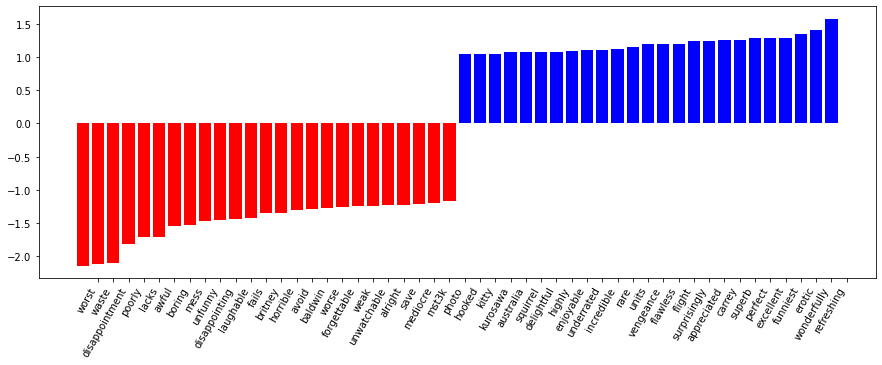

In [14]:
visualize_coefficients(logit, cv.get_feature_names())

In [15]:
print(time.time()-start_time)

116.10069036483765
